In [1]:
import requests
import xml.dom.minidom as m

In [253]:
#https://stackoverflow.com/questions/317413/get-element-value-with-minidom-with-python

In [4]:
#Use the requests module (or urllib) to use the Entrez API (see slides8) to identify the PubMed IDs 
#for 1000 Alzheimers papers from 2019 and for 1000 cancer papers from 2019. (9 points)

In [2]:
def get_id(disease): 
    r = requests.get(f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={disease}+AND+2019[pdat]&retmode=xml&retmax=1000")
    doc = m.parseString(r.text)
    get_id = doc.getElementsByTagName("Id")
    #print(get_id)
    my_n_node = []
    for i in range(len(get_id)):
        my_n_node.append(get_id[i])
        i+=1
    my_child = []
    for j in range(len(my_n_node)):
        my_child.append(my_n_node[j].firstChild)
        j+=1
    my_text = []
    for k in range (len(my_child)):
        my_text.append(my_child[k].data)
        k+=1
    return my_text

In [3]:
get_id("ALZHEIMERS")

['34692095',
 '34692000',
 '33939349',
 '33841007',
 '33627920',
 '33463291',
 '33323224',
 '33243028',
 '33097841',
 '32954270',
 '32821704',
 '32802097',
 '32641955',
 '32598641',
 '32501203',
 '32489952',
 '32477473',
 '32477472',
 '32399472',
 '32375155',
 '32363346',
 '32341985',
 '32341979',
 '32322468',
 '32322464',
 '32308848',
 '32269839',
 '32269835',
 '32254802',
 '32232173',
 '32222300',
 '32209796',
 '32202743',
 '32202739',
 '32186116',
 '32147039',
 '32140393',
 '32140387',
 '32118475',
 '32116643',
 '32116624',
 '32114583',
 '32099861',
 '32096053',
 '32096052',
 '32096051',
 '32096050',
 '32096047',
 '32096046',
 '32096045',
 '32096044',
 '32096043',
 '32096042',
 '32096041',
 '32096039',
 '32096038',
 '32096036',
 '32096034',
 '32096033',
 '32096032',
 '32096030',
 '32096029',
 '32096028',
 '32096027',
 '32096025',
 '32096024',
 '32089828',
 '32087948',
 '32083083',
 '32082970',
 '32082407',
 '32072882',
 '32065917',
 '32063857',
 '32062666',
 '32057309',
 '32057308',

In [4]:
get_id ("CANCER")

['34702262',
 '34692085',
 '34691993',
 '34691992',
 '34691990',
 '34691989',
 '34691986',
 '34691933',
 '34691895',
 '34691351',
 '34590506',
 '34539049',
 '34539046',
 '34493369',
 '34460208',
 '34460207',
 '34460206',
 '34460205',
 '34460204',
 '34460203',
 '34460202',
 '34460201',
 '34460200',
 '34460199',
 '34460198',
 '34460197',
 '34460196',
 '34460195',
 '34460194',
 '34460193',
 '34460192',
 '34460191',
 '34460190',
 '34460189',
 '34460188',
 '34460187',
 '34426479',
 '34414848',
 '34414847',
 '34306915',
 '34243914',
 '34243910',
 '34239389',
 '34190022',
 '34177378',
 '34175032',
 '34096432',
 '34082642',
 '34059235',
 '34027418',
 '34026405',
 '34026404',
 '34024926',
 '33998520',
 '33994729',
 '33994726',
 '33994724',
 '33994723',
 '33979095',
 '33979094',
 '33979093',
 '33979092',
 '33979091',
 '33979090',
 '33979089',
 '33979088',
 '33979087',
 '33979086',
 '33979085',
 '33979084',
 '33979083',
 '33979082',
 '33979081',
 '33979080',
 '33979079',
 '33979078',
 '33979077',

In [28]:
len(get_id("ALZHEIMERS")+get_id("CANCER"))


2000

In [84]:
#There are of course many more papers of each category, but is there any overlap in 
#the two sets of papers that you identified? 

In [29]:
def overlap(disease1,disease2):
    return set(get_id(disease1))&set(get_id (disease2))

In [30]:
overlap("ALZHEIMERS","CANCER")

{'32501203'}

In [5]:
import json
import time

In [10]:
def get_info(disease1,disease2):
    pmid_list=get_id(disease1)+get_id(disease2)
    info_dic = {}
    #print(pmid_list)
    for id in pmid_list:
        time.sleep(1)
        r = requests.post(
            f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id={int(id)}")
        doc = m.parseString(r.text)
              
    #https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
    #https://docs.python.org/3/tutorial/errors.html
        article_titles = doc.getElementsByTagName("ArticleTitle")
        title = ""
        if len(article_titles)!=0:
            child = article_titles[0].firstChild
            if child is None:
                 print("someone is missing a title")
            else:
                if child.nodeType == m.Node.TEXT_NODE:
                    title+=child.data
                
        article_abstract = doc.getElementsByTagName("AbstractText")
        abstract = ""
        if len(article_abstract)!=0:
            child = article_abstract[0].firstChild
            if child is None:
                 print("someone is missing abstract")
            else:
                if child.nodeType == m.Node.TEXT_NODE:
                    abstract+=child.data
                
        article_mesh = doc.getElementsByTagName("MeshHeading")
        mesh = []
        if len(article_mesh)>0:
            for i in article_mesh:
                if i.firstChild.childNodes[0].nodeValue is None:
                     print("someone is missing mesh")
                else:   
                    mesh.append(i.firstChild.childNodes[0].nodeValue)
        query=[]
        if id in get_id(disease1):
            query.append(disease1)
        if id in get_id(disease2):
            query.append(disease2)
        
        info_dic[id]={"ArticleTitle":title,
                     "AbstractText":abstract,
                     "Query":query,
                     "MeshHeading":mesh,
                    }
    with open('pb2000.json', 'w') as outfile:
        json.dump(info_dic, outfile)

In [11]:
get_info("CANCER","ALZHEIMERS")

someone is missing a title


In [ ]:
#Q2.1What fraction of the Alzheimer's papers have no MeSH terms? 

In [12]:
with open("/Users/ycliu/Desktop/pb2000.json", "r") as read_it:
    all_data = json.load(read_it)

In [13]:
#total=len(all_data)
def mesh_fraction(disease):
    count_paper=0
    count_mesh_empty = 0
    disease_list = get_id(disease)
    for i in disease_list:
        if all_data[i]["MeshHeading"]==[]:
            count_mesh_empty+=1
        count_paper+=1
    mesh_fraction=count_mesh_empty/count_paper
    return mesh_fraction

In [14]:
mesh_fraction("ALZHEIMERS")

0.165

In [15]:
#What fraction of the cancer papers have no MeSH terms? 

In [16]:
mesh_fraction("CANCER")

0.759

In [17]:
#What are the 10 most common MeSH terms for the Alzheimer's papers whose metadata you found in Exercise 1? 

In [27]:
from collections import Counter

In [28]:
def mesh_count(disease):
    mesh = []
    for i in all_data:
        if all_data[i]["Query"]==[disease] or all_data[i]["Query"]==["ALZHEIMERS","CANCER"]:
            mesh+=all_data[i]["MeshHeading"]
    d = {}
    for i in set(mesh):
        count = 0
        for j in mesh:
            if i == j:
                count+=1
            d[i]=count
    return d
    
    

In [29]:
mesh_count("ALZHEIMERS")

{'Dystonia': 1,
 'Angelica': 1,
 'Cell Survival': 14,
 'RNA Interference': 1,
 'Macrophages': 1,
 'Continental Population Groups': 1,
 'Calcium Channels': 1,
 'Anxiety': 8,
 'Depressive Disorder': 1,
 'Drosophila melanogaster': 3,
 'Cerebral Cortex': 21,
 'Receptors, Nicotinic': 2,
 'Fluorescence Recovery After Photobleaching': 1,
 'Zebrafish': 1,
 'Alpinia': 1,
 'Ophthalmic Solutions': 1,
 'Dementia': 68,
 'Pueraria': 1,
 'Fruit': 3,
 'Infection Control': 1,
 'Laboratory Animal Science': 1,
 'Consensus': 1,
 'Drugs, Chinese Herbal': 14,
 'Neprilysin': 1,
 'NEDD8 Protein': 1,
 'Protein Kinase Inhibitors': 1,
 'Oxytocin': 1,
 'Spatio-Temporal Analysis': 1,
 'Macaca fascicularis': 1,
 'Ultrasonography': 1,
 'Cell Nucleus': 1,
 'Takotsubo Cardiomyopathy': 1,
 'Benzoates': 1,
 'Program Evaluation': 1,
 'Feces': 1,
 'Piperazine': 1,
 'Chalcone': 1,
 'Sweden': 2,
 'Cognitive Behavioral Therapy': 1,
 'Gamma Rhythm': 1,
 'Placebo Effect': 1,
 'Healthy Aging': 4,
 'Xanthophylls': 1,
 'Fluoresce

In [30]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
def first_ten_items(disease):
    disease_mesh = mesh_count(disease)
    c=Counter(disease_mesh).most_common()
    #print(c)
    first_ten = c[:10]
    return(first_ten)

In [31]:
first_ten_items("ALZHEIMERS")

[('Humans', 701),
 ('Alzheimer Disease', 699),
 ('Male', 349),
 ('Female', 296),
 ('Aged', 285),
 ('Animals', 270),
 ('Amyloid beta-Peptides', 210),
 ('Brain', 190),
 ('Aged, 80 and over', 168),
 ('Cognitive Dysfunction', 157)]

In [23]:
#Provide a graphic illustrating their relative frequency. (3 points)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

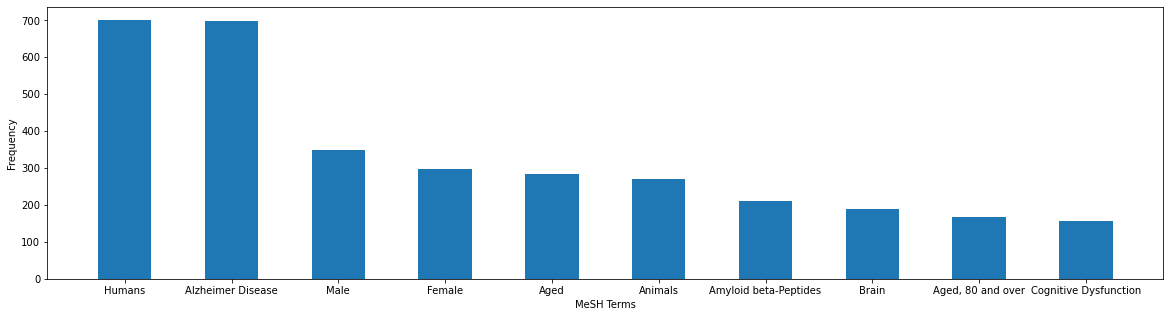

In [52]:
#https://stackoverflow.com/questions/34029865/how-to-plot-bar-chart-for-a-list-in-python
labels, ys = zip(*first_ten_items("ALZHEIMERS"))
xs = np.arange(len(labels)) 
width = 0.5
plt.figure(figsize=(20,5))
plt.bar(xs, ys,width,align='center')
plt.ylabel('Frequency')
plt.xlabel('MeSH Terms')
plt.xticks(xs,labels) 
plt.yticks()

In [ ]:
#What are the 10 most common MeSH terms for the cancer papers whose metadata you found in Exercise 1? 

In [35]:
mesh_count("CANCER")

{'Bayes Theorem': 1,
 'Nausea': 1,
 'Polymerase Chain Reaction': 5,
 'Wound Healing': 2,
 'Poland': 4,
 'Hydrogels': 1,
 'Free Radical Scavengers': 1,
 'Cell Survival': 1,
 'Neutrophils': 1,
 'Vaccination': 1,
 'Debridement': 1,
 'Heart Diseases': 1,
 'Spermatogonia': 1,
 'Video-Assisted Surgery': 1,
 'Silicon Dioxide': 1,
 'Red-Cell Aplasia, Pure': 1,
 'Microfluidic Analytical Techniques': 2,
 'Biosensing Techniques': 1,
 'Lung': 4,
 'Global Health': 1,
 'Cholelithiasis': 1,
 'Primary Prevention': 2,
 'Psychiatric Status Rating Scales': 1,
 'Endoscopy, Digestive System': 1,
 'Prostate': 1,
 'Testis': 1,
 'Cytosine Deaminase': 2,
 'Fluorouracil': 1,
 'Tonsillitis': 1,
 'Translocation, Genetic': 2,
 'Islets of Langerhans Transplantation': 1,
 'Adipocytes': 1,
 'Case-Control Studies': 2,
 'Tumor Necrosis Factor-alpha': 1,
 'Alleles': 2,
 'Fluorodeoxyglucose F18': 1,
 'Electric Stimulation Therapy': 1,
 'Mechanistic Target of Rapamycin Complex 1': 1,
 'Pain Management': 2,
 'Disease Model

In [36]:
first_ten_items("CANCER")

[('Humans', 221),
 ('Female', 94),
 ('Male', 63),
 ('Middle Aged', 62),
 ('Aged', 53),
 ('Adult', 52),
 ('Animals', 31),
 ('Retrospective Studies', 28),
 ('Neoplasms', 27),
 ('Treatment Outcome', 20)]

In [ ]:
#Provide a graphic illustrating their relative frequency.

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

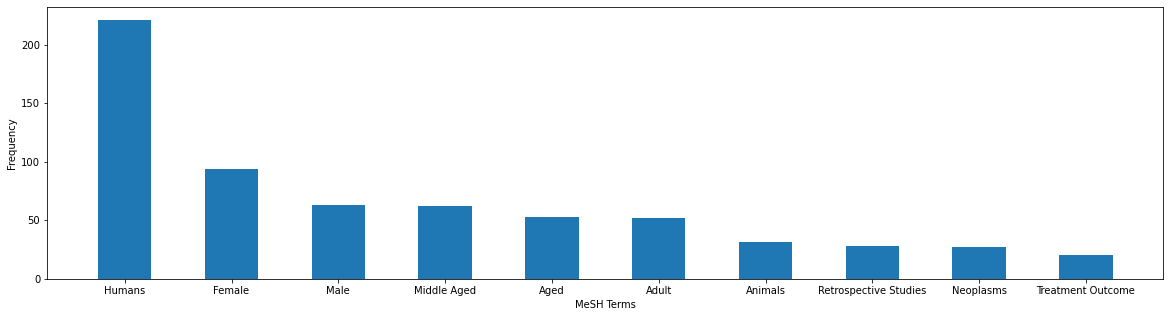

In [53]:
labels, ys = zip(*first_ten_items("CANCER"))
xs = np.arange(len(labels)) 
width = 0.5
plt.figure(figsize=(20,5))
plt.bar(xs, ys,width,align='center')
plt.ylabel('Frequency')
plt.xlabel('MeSH Terms')
plt.xticks(xs, labels) 
plt.yticks()

In [ ]:
#Make a labeled table with rows for each of the top 5 MeSH terms from the Alzheimer's query and columns for 
#each of the top 5 MeSH terms from the cancer query. For the values in the table, provide the count of papers
#(combined, from both sets) having both the matching MeSH terms. 

In [39]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [40]:
from tabulate import tabulate 

In [48]:
def first_5(disease):
    disease_mesh = mesh_count(disease)
    c=Counter(disease_mesh).most_common()
    first_5 = c[:5]
    return(first_5)

In [49]:
matrix = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
]

alz_5 = first_5("ALZHEIMERS")
can_5 = first_5("CANCER")

for i in range(len(alz_5)):
    for j in range(len(can_5)):
        count = 0
        for k in all_data:
            if (alz_5[i][0] in all_data[k]["MeshHeading"]) and (can_5[j][0] in all_data[k]["MeshHeading"]):
                count+=1
            matrix[i][j]= count
print(matrix)

[[923, 379, 369, 207, 339], [585, 234, 280, 108, 228], [369, 326, 413, 179, 288], [379, 391, 326, 191, 295], [339, 295, 288, 174, 339]]


In [50]:
#https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd
table = [['Alzheimer Disease/Cancer','Humans', 'Female', 'Male','Middle Aged','Aged'], ['Humans',922,381, 208, 369, 338], ['Alzheimer Disease', 584, 236, 109, 281, 227], ['Male', 369, 327, 180, 413, 288],['Female',381, 394, 192, 327, 295],['Aged',338, 295, 175, 288, 338]]


In [51]:
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------------------------+----------+----------+--------+---------------+--------+
| Alzheimer Disease/Cancer   |   Humans |   Female |   Male |   Middle Aged |   Aged |
+============================+==========+==========+========+===============+========+
| Humans                     |      922 |      381 |    208 |           369 |    338 |
+----------------------------+----------+----------+--------+---------------+--------+
| Alzheimer Disease          |      584 |      236 |    109 |           281 |    227 |
+----------------------------+----------+----------+--------+---------------+--------+
| Male                       |      369 |      327 |    180 |           413 |    288 |
+----------------------------+----------+----------+--------+---------------+--------+
| Female                     |      381 |      394 |    192 |           327 |    295 |
+----------------------------+----------+----------+--------+---------------+--------+
| Aged                       |      338 |  